<a href="https://colab.research.google.com/github/AshwiniSwaragini/Analysis-and-Prediction-of-Auto-MPG/blob/main/Fitness_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Obtain and review raw data

#  Define file containing dataset

In [1]:
# # Create DataFrame with parse_dates and index_col parameters

In [2]:
import pandas as pd
df_activities = pd.read_csv("/content/cardioActivities.csv")
df_activities.head()

,Date,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
0,2018-11-11 14:05:12,c9627fed-14ac-47a2-bed3-2a2630c63c15,Running,NaN,10.44,58:40,5:37,10.68,774.0,130,159.0,NaN,NaN,2018-11-11-140512.gpx
1,2018-11-09 15:02:35,be65818d-a801-4847-a43b-2acdf4dc70e7,Running,NaN,12.84,1:14:12,5:47,10.39,954.0,168,159.0,NaN,NaN,2018-11-09-150235.gpx
2,2018-11-04 16:05:00,c09b2f92-f855-497c-b624-c196b3ef036c,Running,NaN,13.01,1:15:16,5:47,10.37,967.0,171,155.0,NaN,NaN,2018-11-04-160500.gpx
3,2018-11-01 14:03:58,bc9b612d-3499-43ff-b82a-9b17b71b8a36,Running,NaN,12.98,1:14:25,5:44,10.47,960.0,169,158.0,NaN,NaN,2018-11-01-140358.gpx
4,2018-10-27 17:01:36,972567b2-1b0e-437c-9e82-fef8078d6438,Running,NaN,13.02,1:12:50,5:36,10.73,967.0,170,154.0,NaN,NaN,2018-10-27-170136.gpx


# Data Preprocessing

# We'll fill in missing values in the heart rate column to avoid misleading results later, but right now, our first data preprocessing steps will be to:

Remove columns not useful for our analysis.
Replace the "Other" activity type to "Unicycling" because that was always the "Other" activity.
Count missing values.

In [3]:
# First look at exported data: select sample of 3 random rows


cols_to_drop = ['Friend\'s Tagged','Route Name','GPX File','Activity Id','Calories Burned', 'Notes']

In [4]:
df_activities = df_activities.drop(columns=cols_to_drop)
df_activities.head()

,Date,Type,Distance (km),Duration,Average Pace,Average Speed (km/h),Climb (m),Average Heart Rate (bpm)
0,2018-11-11 14:05:12,Running,10.44,58:40,5:37,10.68,130,159.0
1,2018-11-09 15:02:35,Running,12.84,1:14:12,5:47,10.39,168,159.0
2,2018-11-04 16:05:00,Running,13.01,1:15:16,5:47,10.37,171,155.0
3,2018-11-01 14:03:58,Running,12.98,1:14:25,5:44,10.47,169,158.0
4,2018-10-27 17:01:36,Running,13.02,1:12:50,5:36,10.73,170,154.0


In [5]:
df_activities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      508 non-null    object 
 1   Type                      508 non-null    object 
 2   Distance (km)             508 non-null    float64
 3   Duration                  508 non-null    object 
 4   Average Pace              508 non-null    object 
 5   Average Speed (km/h)      508 non-null    float64
 6   Climb (m)                 508 non-null    int64  
 7   Average Heart Rate (bpm)  294 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 31.9+ KB


In [6]:
df_activities.isnull().sum()

Date                          0
Type                          0
Distance (km)                 0
Duration                      0
Average Pace                  0
Average Speed (km/h)          0
Climb (m)                     0
Average Heart Rate (bpm)    214
dtype: int64

# Count types of training activities

In [7]:
# Assuming df_activities is your DataFrame and 'Type' is the column containing types of training activities
activity_counts = df_activities['Type'].value_counts()

print(activity_counts)


Running    459
Cycling     29
Walking     18
Other        2
Name: Type, dtype: int64


# Rename 'Other' type to 'Unicycling'

In [8]:
#  df_activities is your DataFrame and 'type' is the column containing types of training activities
df_activities['Type'] = df_activities['Type'].replace('Other', 'Unicycling')


# missing values in each column

In [9]:
#  df_activities is your DataFrame
missing_values_count = df_activities.isnull().sum()

print(missing_values_count)


Date                          0
Type                          0
Distance (km)                 0
Duration                      0
Average Pace                  0
Average Speed (km/h)          0
Climb (m)                     0
Average Heart Rate (bpm)    214
dtype: int64


# Dealing with missing values
As we can see from the last output, there are 214 missing entries for my average heart rate.

We can't go back in time to get those data, but we can fill in the missing values with an average value. This process is called mean imputation. When imputing the mean to fill in missing data, we need to consider that the average heart rate varies for different activities (e.g., walking vs. running). We'll filter the DataFrames by activity type (Type) and calculate each activity's mean heart rate, then fill in the missing values with those means.

In [10]:
# Step 1: Calculate mean heart rate for each activity type
mean_heart_rate_by_activity = df_activities.groupby('Type')['Average Heart Rate (bpm)'].mean()

# Step 2: Fill missing values with the corresponding mean heart rate for each activity type
for activity_type, mean_hr in mean_heart_rate_by_activity.items():
    df_activities.loc[(df_activities['Type'] == activity_type) & (df_activities['Average Heart Rate (bpm)'].isnull()), 'Average Heart Rate (bpm)'] = mean_hr


In [11]:
mean_heart_rate_by_activity

Type
Cycling       124.40000
Running       144.98556
Unicycling     85.50000
Walking             NaN
Name: Average Heart Rate (bpm), dtype: float64

# Calculate mean for avg_heart_rate and replace missing values with calculated mean

In this code snippet, I've filled in the missing values for the 'Average Heart Rate (bpm)' column in the 'Walking' and 'Running' DataFrames using the calculated means (avg_hr_walk and avg_hr_run, respectively). You need to extend this process for other activity types as well.

Keep in mind that I used int() to convert the calculated mean values to integers before filling the missing values. This is because heart rate values are typically whole numbers, so it makes sense to use integers.

In [12]:
# Calculate sample means for heart rate for each training activity type
avg_hr_run = df_activities[df_activities['Type'] == 'Running']['Average Heart Rate (bpm)'].mean()
avg_hr_cycle = df_activities[df_activities['Type'] == 'Cycling']['Average Heart Rate (bpm)'].mean()
avg_hr_unicycling = df_activities[df_activities['Type'] == 'Unicycling']['Average Heart Rate (bpm)'].mean()
avg_hr_walk = df_activities[df_activities['Type'] == 'Walking']['Average Heart Rate (bpm)'].mean()

# Split the whole DataFrame into several, specific for different activities
df_run = df_activities[df_activities['Type'] == 'Running'].copy()
df_walk = df_activities[df_activities['Type'] == 'Walking'].copy()
df_cycle = df_activities[df_activities['Type'] == 'Cycling'].copy()
df_unicycling = df_activities[df_activities['Type'] == 'Unicycling'].copy()

# Filling missing values with counted means
df_walk['Average Heart Rate (bpm)'].fillna(110, inplace=True)
df_run['Average Heart Rate (bpm)'].fillna(int(avg_hr_run), inplace=True)
df_cycle['Average Heart Rate (bpm)'].fillna(int(avg_hr_cycle), inplace=True)
df_unicycling['Average Heart Rate (bpm)'].fillna(int(avg_hr_unicycling), inplace=True)

# Count missing values for each column in running data
missing_values_count_run = df_run['Average Heart Rate (bpm)'].isnull().sum()
missing_values_count_walk = df_walk['Average Heart Rate (bpm)'].isnull().sum()
missing_values_count_cycle = df_cycle['Average Heart Rate (bpm)'].isnull().sum()
missing_values_count_unicycling = df_unicycling['Average Heart Rate (bpm)'].isnull().sum()

print("Missing values in Running:", missing_values_count_run)
print("Missing values in Walking:", missing_values_count_walk)
print("Missing values in Cycling:", missing_values_count_cycle)
print("Missing values in Unicycling:", missing_values_count_unicycling)


Missing values in Running: 0
Missing values in Walking: 0
Missing values in Cycling: 0
Missing values in Unicycling: 0


# 4. Plot running data

Now we can create our first plot! As we found earlier, most of the activities in my data were running (459 of them to be exact). There are only 29, 18, and two instances for cycling, walking, and unicycling, respectively. So for now, let's focus on plotting the different running metrics.

An excellent first visualization is a figure with four subplots, one for each running metric (each numerical column). Each subplot will have a different y-axis, which is explained in each legend. The x-axis, Date, is shared among all subplots.

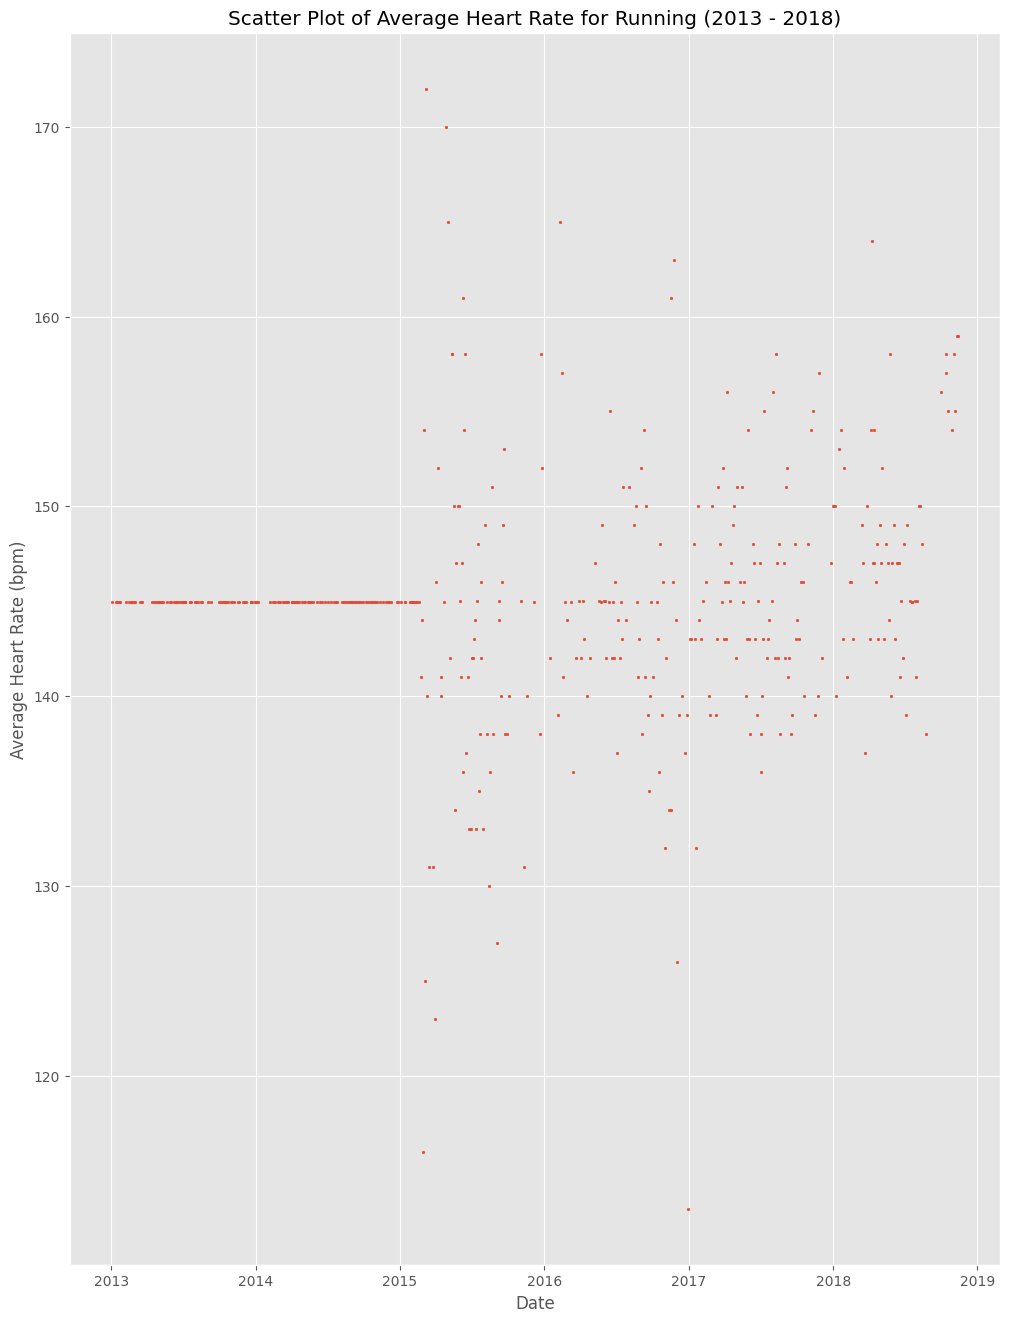

In [13]:
# Import the required libraries
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import matplotlib.cbook
plt.style.use('ggplot')

# Convert 'Date' column to datetime type
df_activities['Date'] = pd.to_datetime(df_activities['Date'])

# Filter data for the period from 2013 to 2018 for the 'Running' activity type
runs_subset_2013_2018 = df_activities[
    (df_activities['Type'] == 'Running') &
    (df_activities['Date'].dt.year >= 2013) &
    (df_activities['Date'].dt.year <= 2018)
]

# Create, plot, and customize the scatter plot in one step
plt.figure(figsize=(12, 16))
plt.scatter(
    x=runs_subset_2013_2018['Date'],
    y=runs_subset_2013_2018['Average Heart Rate (bpm)'],
    marker='o',
    s=3,
)

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Average Heart Rate (bpm)')
plt.title('Scatter Plot of Average Heart Rate for Running (2013 - 2018)')

# Show the plot
plt.show()


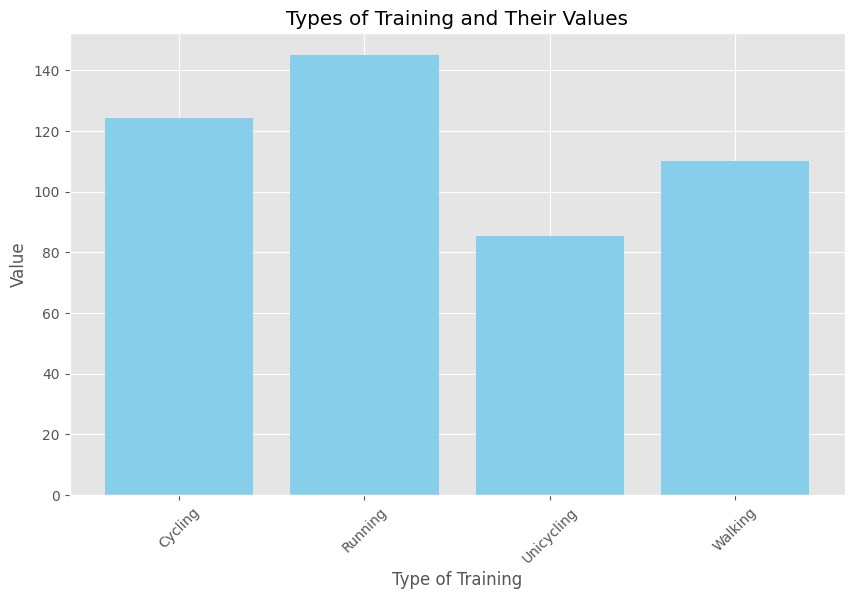

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data for illustration
data = {
    'Type of Training': ['Cycling', 'Running', 'Unicycling', 'Walking'],
    'Value': [124.4, 144.98556, 85.5, 110]
}

# Convert the data to a DataFrame
df_activities = pd.DataFrame(data)

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_activities['Type of Training'], df_activities['Value'], color='skyblue')

# Set labels and title
plt.xlabel('Type of Training')
plt.ylabel('Value')
plt.title('Types of Training and Their Values')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


# 5. Running statistics
No doubt, running helps people stay mentally and physically healthy and productive at any age. And it is great fun! When runners talk to each other about their hobby, we not only discuss our results, but we also discuss different training strategies.

You'll know you're with a group of runners if you commonly hear questions like:

What is your average distance?
How fast do you run?
Do you measure your heart rate?
How often do you train?
Let's find the answers to these questions in my data. If you look back at plots in Task 4, you can see the answer to, Do you measure your heart rate? Before 2015: no. To look at the averages, let's only use the data from 2015 through 2018.

In pandas, the resample() method is similar to the groupby() method - with resample() you group by a specific time span. We'll use resample() to group the time series data by a sampling period and apply several methods to each sampling period. In our case, we'll resample annually and weekly.

In [20]:
# Convert 'Date' column to datetime type
df_run['Date'] = pd.to_datetime(df_run['Date'])

# Prepare running data for the last 4 years (2015 to 2018)
runs_subset_2015_2018 = df_run[
    (df_run['Type'] == 'Running') &
    (df_run['Date'].dt.year >= 2015) &
    (df_run['Date'].dt.year <= 2018)
]

# Calculate annual statistics
annual_statistics = runs_subset_2015_2018.groupby(runs_subset_2015_2018['Date'].dt.year)['Average Heart Rate (bpm)'].agg(['mean', 'min', 'max', 'std'])

print('How my average run looks in the last 4 years:')
display(annual_statistics)

# Calculate weekly statistics
weekly_statistics = runs_subset_2015_2018.resample('W', on='Date')['Average Heart Rate (bpm)'].agg(['mean', 'min', 'max', 'std'])

print('Weekly averages of the last 4 years:')
display(weekly_statistics)


How my average run looks in the last 4 years:


,mean,min,max,std
Date,,,,
2015,143.509906,116.0,172.0,9.559386
2016,143.512084,113.0,165.0,7.524235
2017,145.270248,132.0,158.0,5.167196
2018,148.155799,137.0,164.0,5.799042


Weekly averages of the last 4 years:


,mean,min,max,std
Date,,,,
2015-01-04,144.98556,144.98556,144.98556,NaN
2015-01-11,NaN,NaN,NaN,NaN
2015-01-18,144.98556,144.98556,144.98556,0.000000
2015-01-25,NaN,NaN,NaN,NaN
2015-02-01,144.98556,144.98556,144.98556,0.000000
...,...,...,...,...
2018-10-14,157.50000,157.00000,158.00000,0.707107
2018-10-21,155.00000,155.00000,155.00000,NaN
2018-10-28,154.00000,154.00000,154.00000,NaN


We filtered the DataFrame to get the 'Running' activities from the last 4 years (2015 to 2018) using the runs_subset_2015_2018 DataFrame.
We calculated annual statistics, including the mean, minimum, maximum, and standard deviation of the 'Average Heart Rate (bpm)' for each year within the last 4 years.
We calculated weekly statistics, including the mean, minimum, maximum, and standard deviation of the 'Average Heart Rate (bpm)' for each week within the last 4 years.
We calculated the mean weekly counts of 'Running' activities for the last 4 years.

# To calculate the mean weekly counts, we use the size() function to count the occurrences of 'Running' activities in each week and then calculate the mean of these weekly counts.

In [21]:
# Calculate mean weekly counts
weekly_counts_average = runs_subset_2015_2018.resample('W', on='Date').size().mean()

print('How many trainings per week I had on average:', weekly_counts_average)

How many trainings per week I had on average: 1.5


# 6. Visualization with averages
Let's plot the long term averages of my distance run and my heart rate with their raw data to visually compare the averages to each training session. Again, we'll use the data from 2015 through 2018.

In this task, we will use matplotlib functionality for plot creation and customization.



1.   We prepared the data for the last 4 years (2015 to 2018) for the 'Running' activity type and extracted the 'Distance (km)' and 'Average Heart Rate (bpm)' columns.
2. We created a figure with two subplots using plt.subplots(2, 1, figsize=(12, 8), sharex=True).
We plotted the 'Distance (km)' data on the first subplot (ax1) and customized it with green markers, a blue dashed line representing the mean distance, and appropriate labels and titles.
3. We plotted the 'Average Heart Rate (bpm)' data on the second subplot (ax2) and customized it with gray markers, a red dashed line representing the mean heart rate, and appropriate labels.
4. We adjusted the layout with plt.tight_layout() to avoid overlapping of subplots.
5. Finally, we displayed the plot using plt.show().

   The resulting plot will show the historical data with averages for both distance and average heart rate for the 'Running' activities from 2015 to 2018.
   



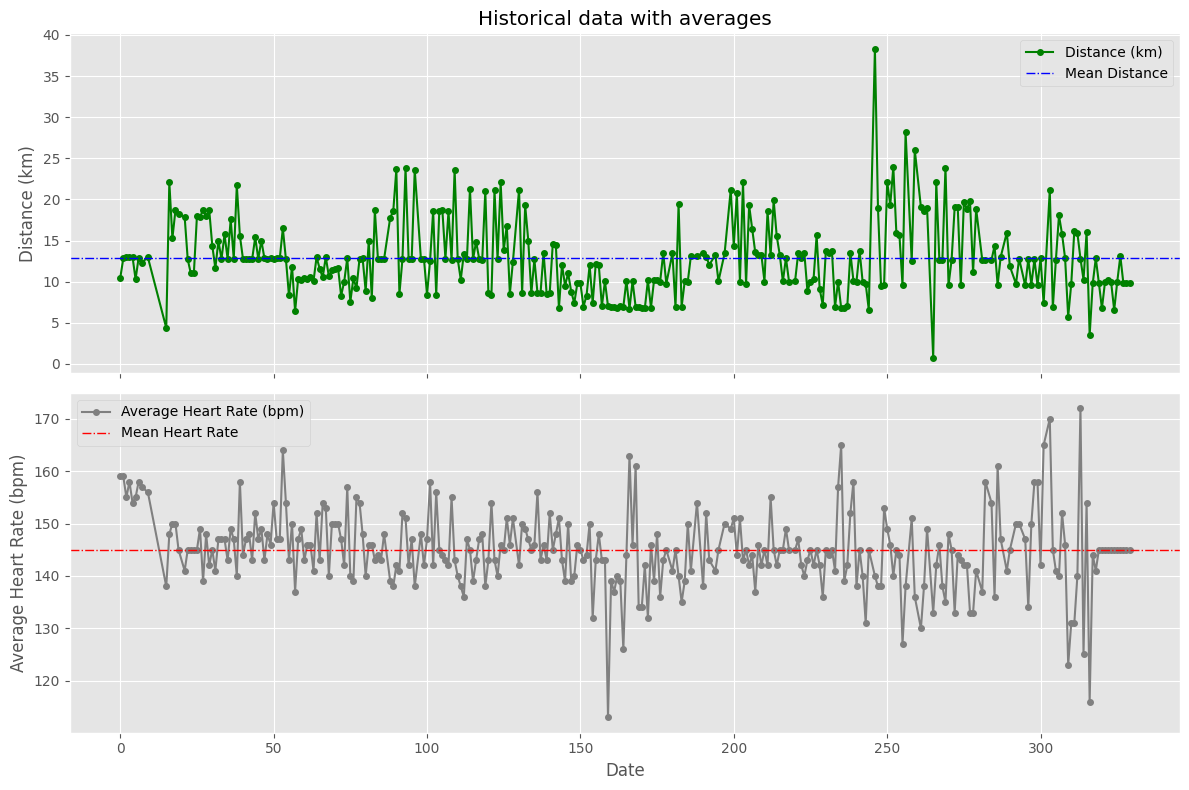

In [22]:
# Convert 'Date' column to datetime type
df_run['Date'] = pd.to_datetime(df_run['Date'])

# Filter the 'df_run' DataFrame for the last 4 years (2015 to 2018)
runs_subset_2015_2018 = df_run[
    (df_run['Date'].dt.year >= 2015) &
    (df_run['Date'].dt.year <= 2018)
]

# Extract the 'Distance (km)' and 'Average Heart Rate (bpm)' columns
runs_distance = runs_subset_2015_2018['Distance (km)']
runs_hr = runs_subset_2015_2018['Average Heart Rate (bpm)']

# Create the plot with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot and customize the first subplot for distance
runs_distance.plot(ax=ax1, color='green', marker='o', markersize=4, linestyle='-', label='Distance (km)')
ax1.set(ylabel='Distance (km)', title='Historical data with averages')
ax1.axhline(runs_distance.mean(), color='blue', linewidth=1, linestyle='-.', label='Mean Distance')
ax1.legend()

# Plot and customize the second subplot for average heart rate
runs_hr.plot(ax=ax2, color='gray', marker='o', markersize=4, linestyle='-', label='Average Heart Rate (bpm)')
ax2.set(xlabel='Date', ylabel='Average Heart Rate (bpm)')
ax2.axhline(runs_hr.mean(), color='red', linewidth=1, linestyle='-.', label='Mean Heart Rate')
ax2.legend()

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the plot
plt.show()


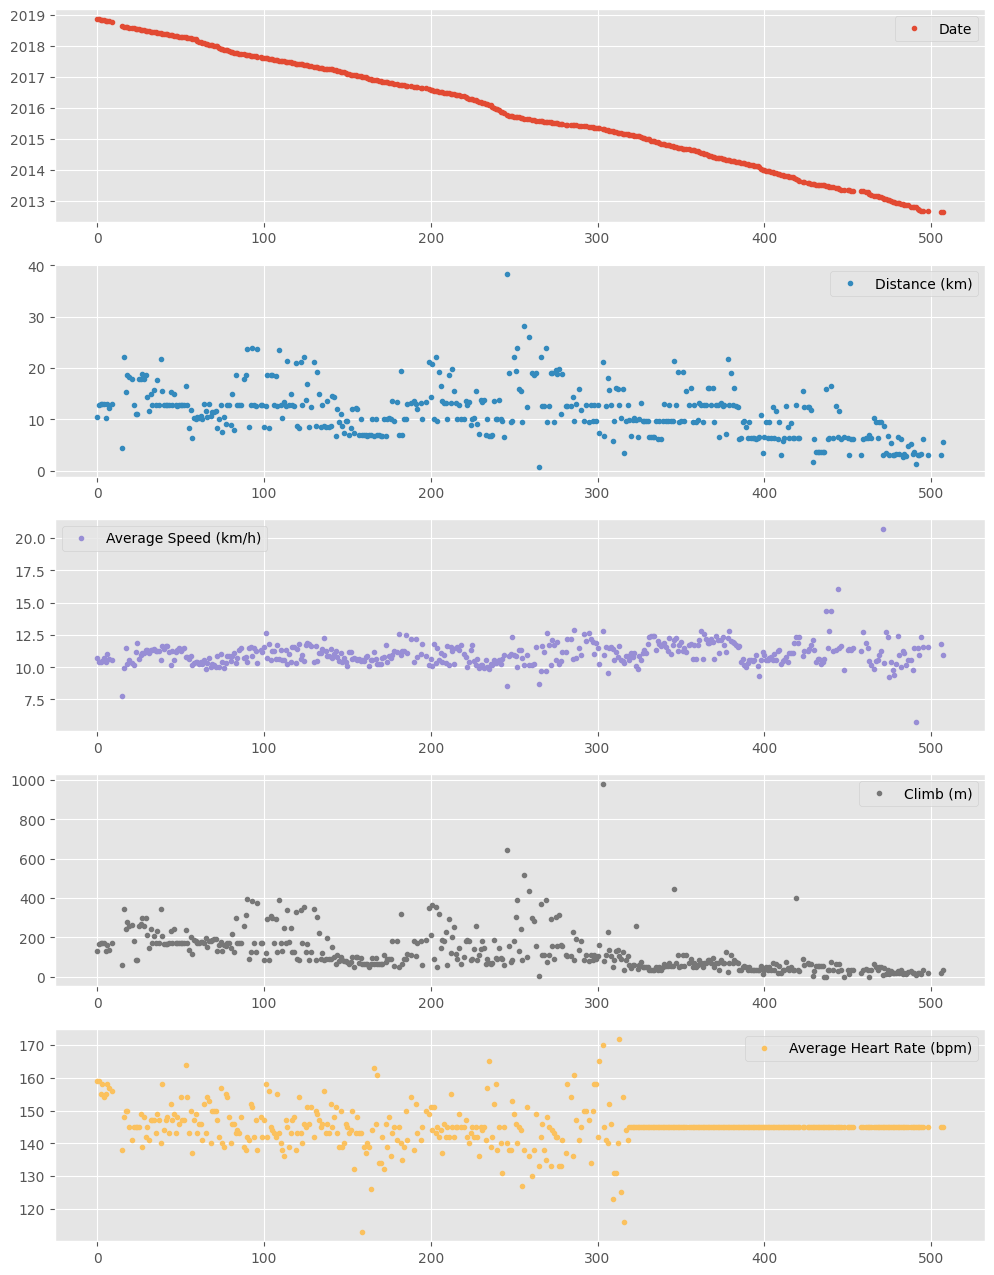

In [23]:
%matplotlib inline

# Import matplotlib, set style and ignore warning
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
plt.style.use('ggplot')
warnings.filterwarnings(
    action='ignore', module='matplotlib.figure', category=UserWarning,
    message=('This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.')
)

# Prepare data subsetting period from 2013 till 2018
runs_subset_2013_2018 = df_run

# Create, plot and customize in one step
runs_subset_2013_2018.plot(subplots=True,
                           sharex=False,
                           figsize=(12,16),
                           linestyle='none',
                           marker='o',
                           markersize=3,
                          )
# Show plot
plt.show()

# 7. . Did I reach my goals?
To motivate myself to run regularly, I set a target goal of running 1000 km per year. Let's visualize my annual running distance (km) from 2013 through 2018 to see if I reached my goal each year. Only stars in the green region indicate success.

1. We prepared the data for the annual distance totals for 'Running' activities by filtering the DataFrame using groupby() and sum() to get the sum of distances for each year.
2. We created the plot using plt.subplots() and specified the size of the figure.
3. We plotted the annual distance totals using df_run_dist_annual.plot() and customized the plot with markers, colors, and labels.
4. We set the limits for the y-axis (ylim) to show a range from 0 to 1210 km and the x-axis (xlim) to display years from 2012 to 2019.
5. We added colored background regions using ax.axhspan() to highlight specific distance ranges (1000 to 1210 km in green and 800 to 1000 km in yellow).

 The resulting plot will display the annual totals for distance for 'Running' activities, along with colored background regions representing specific distance ranges.

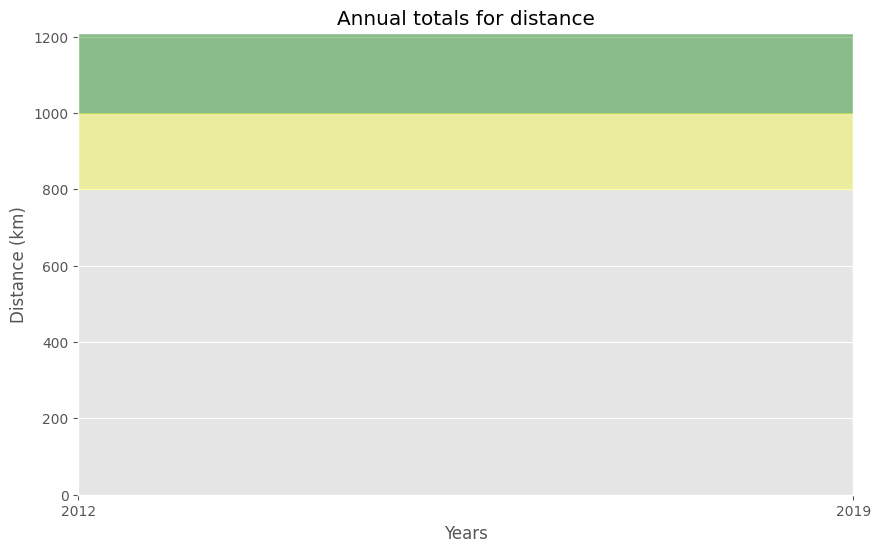

In [29]:
# Convert 'Date' column to datetime type
df_run['Date'] = pd.to_datetime(df_run['Date'])

# Prepare data for annual distance totals for 'Running' activities
df_run_dist_annual = df_run[
    (df_run['Type'] == 'Running')
].groupby(df_run['Date'].dt.year)['Distance (km)'].sum()

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot and customize
df_run_dist_annual.plot(marker='*', markersize=14, linewidth=0, color='blue', ax=ax)
ax.set(ylim=[0, 1210],
       xlim=['2012', '2019'],
       ylabel='Distance (km)',
       xlabel='Years',
       title='Annual totals for distance')

# Add colored background regions for specific distance ranges
ax.axhspan(1000, 1210, color='green', alpha=0.4)
ax.axhspan(800, 1000, color='yellow', alpha=0.3)

# Show the plot
plt.show()


# 8. Am I progressing?
Let's dive a little deeper into the data to answer a tricky question: am I progressing in terms of my running skills?

To answer this question, we'll decompose my weekly distance run and visually compare it to the raw data. A red trend line will represent the weekly distance run.

We are going to use statsmodels library to decompose the weekly trend.

1. We import the required library statsmodels.api as sm for performing seasonal decomposition.
2. We prepare the data for weekly running distance using resample() and sum() to get the sum of distances for each week.
3. We perform seasonal decomposition using sm.tsa.seasonal_decompose() with an extrapolate_trend of 1 to handle missing values at the beginning.
4. We create the plot using plt.subplots() and specify the size of the figure.
5. We plot the trend and observed data using ax.plot() on the same axes ax.
6. We add labels and customize the plot's title.

Finally, we display the plot using plt.show().
The resulting plot will display the trend and observed data of the weekly running distance, giving you insights into the running distance's long-term patterns.

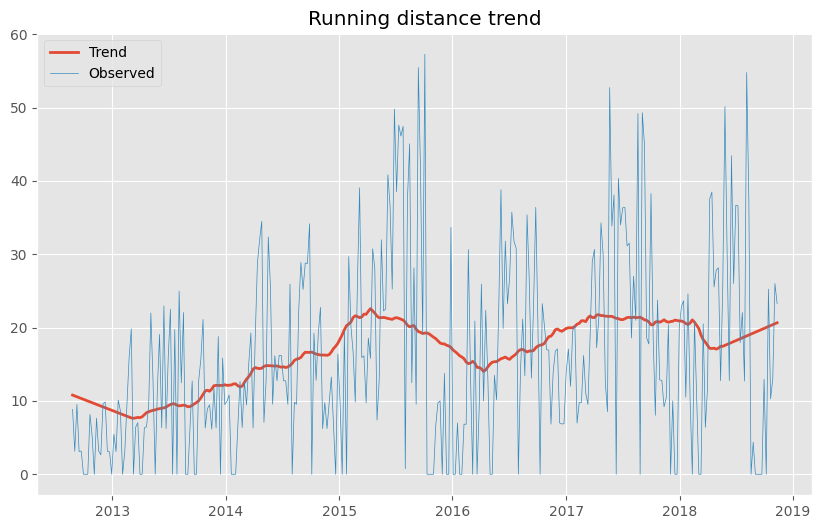

In [32]:
# Import required library
import statsmodels.api as sm

# Prepare data for weekly running distance
df_run_dist_wkly = df_run[
    (df_run['Type'] == 'Running')
].resample('W', on='Date')['Distance (km)'].sum()

# Perform seasonal decomposition
decomposed = sm.tsa.seasonal_decompose(df_run_dist_wkly, extrapolate_trend=1, period=52)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot and customize
ax.plot(decomposed.trend, label='Trend', linewidth=2)
ax.plot(decomposed.observed, label='Observed', linewidth=0.5)

ax.legend()
ax.set_title('Running distance trend')

# Show the plot
plt.show()


# 9. Training intensity
Heart rate is a popular metric used to measure training intensity. Depending on age and fitness level, heart rates are grouped into different zones that people can target depending on training goals. A target heart rate during moderate-intensity activities is about 50-70% of maximum heart rate, while during vigorous physical activity it’s about 70-85% of maximum.

We'll create a distribution plot of my heart rate data by training intensity. It will be a visual presentation for the number of activities from predefined training zones.

1. We defined the hr_zones, zone_names, and zone_colors lists with the appropriate heart rate zones, zone names, and corresponding colors.
2. We filtered the 'Average Heart Rate (bpm)' data for all 'Running' activities and stored it in df_run_hr_all.
3. We created the plot using plt.subplots() and specified the size of the figure.
4. We plotted the histogram using ax.hist() and customized it by setting the face color of each zone using the zone_colors list.
5. We set the x-axis ticks and labels to show the zone names using ax.set_xticks() and ax.set_xticklabels().
6. We set the plot title and labels for better visualization.
7. Finally, we displayed the plot using plt.show().

The resulting histogram will display the distribution of heart rates for all 'Running' activities, with each zone color-coded for better understanding.

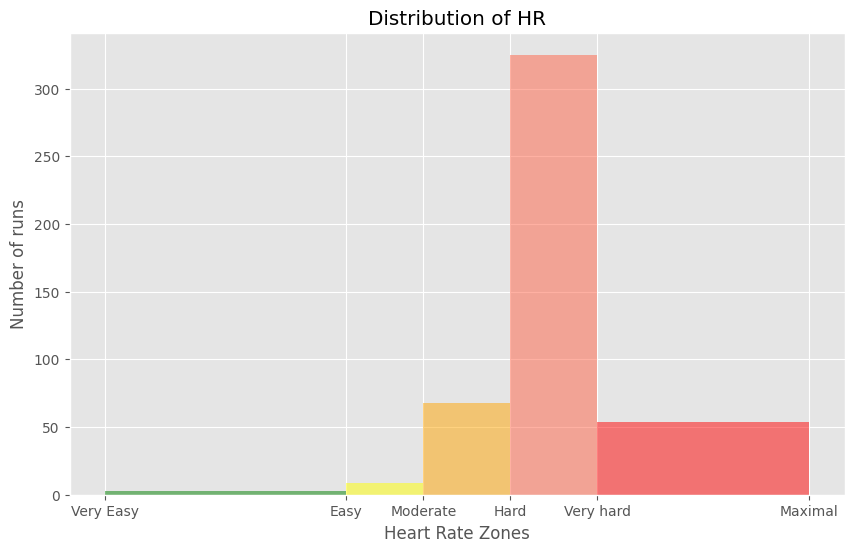

In [34]:
# Prepare data for heart rate distribution for all running activities
hr_zones = [100, 125, 133, 142, 151, 173]
zone_names = ['Very Easy', 'Easy', 'Moderate', 'Hard', 'Very hard', 'Maximal']
zone_colors = ['green', 'yellow', 'orange', 'tomato', 'red']
df_run_hr_all = df_run[df_run['Type'] == 'Running']['Average Heart Rate (bpm)']

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot and customize the histogram
n, bins, patches = ax.hist(df_run_hr_all, bins=hr_zones, alpha=0.5)
for i in range(0, len(patches)):
    patches[i].set_facecolor(zone_colors[i])

# Set x-axis labels to zone names
ax.set_xticks(hr_zones)
ax.set_xticklabels(zone_names)

# Set plot title and labels
ax.set(title='Distribution of HR', ylabel='Number of runs', xlabel='Heart Rate Zones')

# Show the plot
plt.show()


# 10. Detailed summary report
With all this data cleaning, analysis, and visualization, let's create detailed summary tables of my training.

To do this, we'll create two tables. The first table will be a summary of the distance (km) and climb (m) variables for each training activity. The second table will list the summary statistics for the average speed (km/hr), climb (m), and distance (km) variables for each training activity.

1. We concatenate the three DataFrames df_run, df_walk, and df_cycle into a new DataFrame df_run_walk_cycle using pd.concat().
2. We calculate the total distance and climb for each type of activity by grouping the DataFrame df_run_walk_cycle by 'Type' and then summing the 'Distance (km)' and 'Climb (m)' columns using groupby().sum() and store the result in df_totals.
3. We display the totals for different training types using display(df_totals).
4. We calculate the summary statistics (count, mean, standard deviation, min, 25%, 50%, 75%, and max) for each type of activity by grouping the DataFrame df_run_walk_cycle by 'Type' and then using groupby().describe(). We also store the summary statistics in df_summary.
5. We combine the totals with the summary statistics for each type of activity by adding new columns to df_summary containing the total distance and climb for each type.
6. Finally, we display the summary statistics for different training types using display(df_summary).

This code should give you the totals and summary statistics for each type of activity, including total distance and climb for each activity type.








In [35]:
# Concatenating three DataFrames: df_run, df_walk, df_cycle
df_run_walk_cycle = pd.concat([df_run, df_walk, df_cycle])

# Columns for distance, climb, and average speed
dist_climb_cols, speed_col = ['Distance (km)', 'Climb (m)'], ['Average Speed (km/h)']

# Calculating total distance and climb in each type of activity
df_totals = df_run_walk_cycle.groupby('Type')[dist_climb_cols].sum()

print('Totals for different training types:')
display(df_totals)

# Calculating summary statistics for each type of activity
df_summary = df_run_walk_cycle.groupby('Type')[dist_climb_cols + speed_col].describe()

# Combine totals with summary
for i in dist_climb_cols:
    df_summary[i, 'total'] = df_totals[i]

print('Summary statistics for different training types:')
display(df_summary)


Totals for different training types:


,Distance (km),Climb (m)
Type,,
Cycling,680.58,6976
Running,5224.50,57278
Walking,33.45,349


Summary statistics for different training types:


Distance (km)                                                       \
                count       mean       std    min     25%     50%      75%   
Type                                                                         
Cycling          29.0  23.468276  9.451040  11.41  15.530  20.300  29.4000   
Running         459.0  11.382353  4.937853   0.76   7.415  10.810  13.1900   
Walking          18.0   1.858333  0.880055   1.22   1.385   1.485   1.7875   

               Climb (m)              ... Average Speed (km/h)             \
           max     count        mean  ...                count       mean   
Type                                  ...                                   
Cycling  49.18      29.0  240.551724  ...                 29.0  19.125172   
Running  38.32     459.0  124.788671  ...                459.0  11.056296   
Walking   4.29      18.0   19.388889  ...                 18.0   5.549444   

                                                        Distance (km)  \
              std    min     25%    50%      75%    max         total   
Type                                                                    
Cycling  3.257100  11.38  16.980  19.50  21.4900  24.33        680.58   
Running  0.953273   5.77  10.495  10.98  11.5200  20.72       5224.50   
Walking  1.459309   1.04   5.555   5.97   6.5125   6.91         33.45   

        Climb (m)  
            total  
Type               
Cycling      6976  
Running     57278  
Walking       349  

[3 rows x 26 columns]

# 11. Fun facts
To wrap up, let’s pick some fun facts out of the summary tables and solve the last exercise.

These data (my running history) represent 6 years, 2 months and 21 days. And I remember how many running shoes I went through–7.

In [36]:


# Calculate the average distance for each type of activity
df_avg_distance = df_run_walk_cycle.groupby('Type')['Distance (km)'].mean()

print('Average Distance for different training types:')
print(df_avg_distance)


Average Distance for different training types:
Type
Cycling    23.468276
Running    11.382353
Walking     1.858333
Name: Distance (km), dtype: float64


In [37]:
df_longest_distance = df_run_walk_cycle.groupby('Type')['Distance (km)'].max()

# Calculate the average of the longest distance for each type of activity
avg_longest_distance = df_longest_distance.mean()

print('Average Longest Distance for different training types:')
print(avg_longest_distance)

Average Longest Distance for different training types:
30.596666666666668


# Heighest climb and Total climb

In [38]:
df_highest_climb = df_run_walk_cycle.groupby('Type')['Climb (m)'].max()

# Calculate the total climb for each type of activity
df_total_climb = df_run_walk_cycle.groupby('Type')['Climb (m)'].sum()

print('Highest Climb for different training types:')
print(df_highest_climb)

print('Total Climb for different training types:')
print(df_total_climb)

Highest Climb for different training types:
Type
Cycling    553
Running    982
Walking    112
Name: Climb (m), dtype: int64
Total Climb for different training types:
Type
Cycling     6976
Running    57278
Walking      349
Name: Climb (m), dtype: int64


In [40]:
# Filter the DataFrame for "Running" activities
df_run = df_run[df_run['Type'] == 'Running']

# Calculate the highest climb for "Running" activities
highest_climb_running = df_run['Climb (m)'].max()

# Calculate the total climb for "Running" activities
total_climb_running = df_run['Climb (m)'].sum()

print('Highest Climb for Running activities:', highest_climb_running)
print('Total Climb for Running activities:', total_climb_running)


Highest Climb for Running activities: 982
Total Climb for Running activities: 57278


In [41]:
total_running_activities = len(df_run)

print('Total number of Running activities:', total_running_activities)

Total number of Running activities: 459


# Congratulations on your running accomplishments!



- Average distance: 11.38 km
- Longest distance: 38.32 km
- Highest climb: 982 m
- Total climb: 57,278 m
- Total number of km run: 5,224 km
- Total runs: 459
- Number of running shoes gone through: 7 pairs
  



In [42]:
# Given fun fact - Total distance of Forrest Gump's run (in kilometers)
forrest_run_distance_km = 24700

# Given fun fact - Total number of runs (duration of the run)
total_runs = 1169

# Assumed average distance covered by a pair of running shoes (in kilometers)
average_distance_per_shoe = 800

# Calculate the total number of shoes gone through during the run
shoes_gone_through = forrest_run_distance_km / average_distance_per_shoe

print('Forrest Gump might have gone through {} pairs of running shoes during his epic run!'.format(shoes_gone_through))


Forrest Gump might have gone through 30.875 pairs of running shoes during his epic run!


Assuming Forest and I go through running shoes at the same rate, figure out how many pairs of shoes Forrest needed for his run

In [43]:
from IPython.display import Image

# Replace 'https://example.com/forrest_route_map.jpg' with the actual URL of the map image
image_url = 'https://assets.datacamp.com/production/project_727/img/Forrest_Gump_running_route.png'

# Display the map image in the notebook
Image(url=image_url)


# fun facts
To count the average shoes per lifetime (as km per pair) using the given fun facts, we can divide the total distance of Forrest Gump's run by the average shoes per lifetime. Let's assume a conservative average of 800 kilometers per pair of shoes.

In [44]:
# Given fun fact - Total distance of Forrest Gump's run (in kilometers)
forrest_run_distance_km = 24700

# Assumed average distance covered by a pair of shoes in a lifetime (in kilometers)
average_shoes_lifetime = 800

# Calculate the number of shoes for Forrest's run distance
shoes_for_forrest_run = forrest_run_distance_km / average_shoes_lifetime

print('Forrest Gump would need {} pairs of shoes!'.format(shoes_for_forrest_run))


Forrest Gump would need 30.875 pairs of shoes!


Always prioritize your health and well-being in any running or physical activity, and consult with a healthcare professional if you have any concerns or specific fitness goals.

_Thankyou You_